# stochastic modeling

Things it's useful to be able to do with stochastic models:

- apply the rules for means and variances propagating through linear functions. That is, if $X$ is a random variable, $\bar X$ denotes a mean (expectation) of $X$, and $\sigma^2(X)$ denotes its variance, and $a$ and $b$ are constants, then in general

$$
\overline{a + bX + c Y} = a + b \bar X + c \bar Y;
$$
(the only restriction is that the expectations of the random variables are well-defined).

For variances, adding a constant doesn't make a difference, multiplying by a constant does, and addition is a little bit more complex:
$$
\sigma^2(a+bX+cY) = b^2 \sigma^2(X) + c^2 \sigma^2(Y) + 2 b c \, \text{Cov}(X,Y)
$$
where $\text{Cov}(X,Y)$ denotes the covariance between $X$ and $Y$.

We often set up stochastic models so that we are adding *independent* values (i.e. $\text{Cov}(X,Y)=0$, e.g. a random walk model

$$
\begin{split}
N(t+1) & = N(t) + \varsigma \epsilon \\
N(0) & = 0 \\
\epsilon & \sim {\cal N}(0,1)
\end{split}
$$
where the last line means "$\epsilon$ is distributed as a standard Normal variate, with mean 0 and variance 1" has zero mean ($\sum \bar \epsilon=0$) and variance linearly increasing with time ($\sum \sigma^2(\varsigma\epsilon) = \varsigma^2 \sum \sigma^2(\epsilon) = \varsigma^2 t$)

- apply the rules for *approximating* means and variances of nonlinear functions, i.e.
     - *Jensen's inequality*: 
$$
\overline{f(x)} \approx f(\bar x) + \frac{1}{2} \left .\frac{\partial^2 f}{\partial x^2}\right|_{x=\bar x} \sigma^2(x)
$$
     - *delta method* for variances:
$$
\sigma^2(f(x)) \approx \left(\left. \frac{\partial f}{\partial x}\right|_{x=\bar x}\right)^2 \sigma^2(x)
$$

In [3]:
import numpy as np
import numpy.random as npr
npr.seed(101)  ## set random number seed for reproducibility
import matplotlib.pyplot as plt

In [4]:
pois = npr.poisson(3,1000)

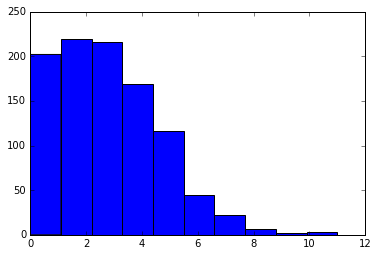

In [7]:
%matplotlib inline
plt.hist(pois);

Histograms are actually best for *continuous* distributions; they tend to be a bit confusing for discrete distributions. Here's a nice way to plot a discrete count distribution (

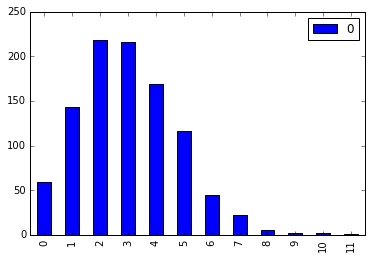

In [56]:
%matplotlib inline
import pandas as pd
bb = np.bincount(pois) ## tabulate values
dd = pd.DataFrame(bb)  ## convert np array into a Pandas data frame
dd.plot(kind="bar");

# Sampling from various distributions

[reference](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html) for sampling random deviates

In [57]:
npr.poisson(3,5)  ## 5 samples from Poisson with mean = 3

array([3, 2, 3, 2, 2])

In [58]:
npr.randn(5) ## 5 samples from standard Normal

array([ 0.10051626, -0.05300651, -0.17884344, -0.57433336,  0.00590355])

In [59]:
npr.normal(loc=2,scale=3,size=5) ## 5 samples from Normal with mean 2, sd 3

array([ 2.78520983, -2.6230809 ,  0.0669693 ,  0.74492026, -1.6483209 ])

In [60]:
npr.exponential(scale=3,size=5)  ## 5 samples from Exponential with mean 3

array([ 1.82313591,  2.9418865 ,  2.18378809,  5.22243936,  0.57450132])

In [61]:
npr.binomial(n=10,p=0.2,size=5)

array([3, 1, 0, 1, 1])

Sampling from a negative binomial with specified mean and overdispersion is a bit more of a nuisance since the built-in `negative.binomial` function takes `n` and `p`:

In [29]:
def mynbinom(mean,disp,size):
    p = disp/(disp+mean)
    return(npr.negative_binomial(n=disp,p=p,size=size))

In [30]:
mynbinom(mean=3,disp=1,size=5)

array([4, 1, 3, 1, 7])

Check that I got it right: are the mean and variance of a large sample close to their expectations?

In [33]:
mu, k = 3, 0.5
samp = mynbinom(mean=mu,disp=k,size=10000)
np.mean(samp)

3.0232999999999999

In [36]:
np.var(samp)

21.797157110000001

In [35]:
mu*(1+mu/k)

21.0

In [39]:
np.std(samp)

4.6687425619753338

# Random walk models

A random walk model: $N(t+1) = N(t) + \epsilon$ where $\epsilon \sim {\cal N}(0,\sigma^2)$; equivalently, $N(t) = \sum_{i=0}^{t-1} \epsilon_i$

We can pick an entire arrayful of Normal deviates at once by specifying the `size` parameter as a tuple:

In [65]:
r = npr.normal(loc=0,scale=2,size=(200,100))

We *could* use a `for` loop to step through and sum up the random walk, but numpy has a `cumsum` function that works nicely.

In [66]:
w = r.cumsum(axis=0)  ## compute columnwise cumulative sums

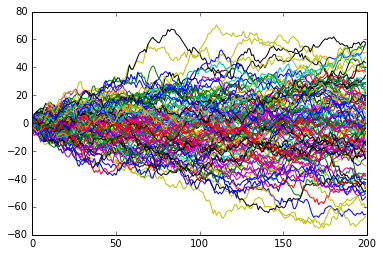

In [46]:
%matplotlib inline
plt.plot(w);

Redo the plot, but (1) all lines in semi-transparent black, (2) add a line showing the mean at each time point (`axis 1`=rowwise means)

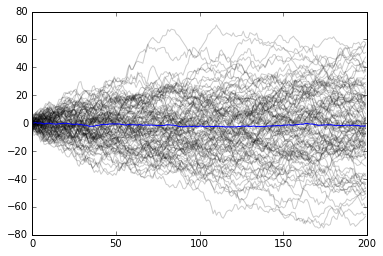

In [50]:
plt.plot(w,c="black",alpha=0.2);
plt.plot(np.mean(w,axis=1));

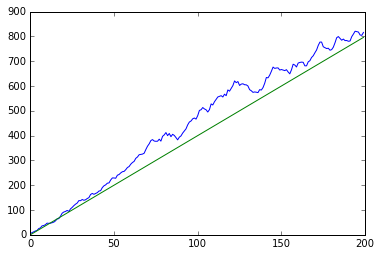

In [55]:
plt.plot(np.var(w,axis=1))  ## variance as a function of time
expvar = np.arange(200)*4   ## expected variance = 4*t (we specified std dev=2)
plt.plot(expvar);

In [71]:
a, s = 0.9, 1
areg = np.zeros((200,100))
for t in range(199):
    areg[t+1,:] = a*areg[t,:]+npr.normal(loc=0,scale=s,size=100)

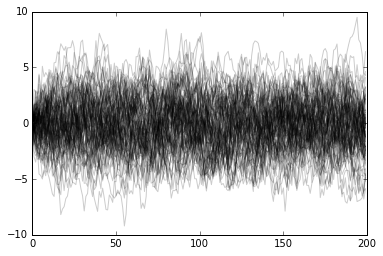

In [72]:
%matplotlib inline
plt.plot(areg,c="black",alpha=0.2);
